# K-Nearest Neighbor

### Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
import pickle

### Data Preparation 

In [5]:
df = pd.read_csv('Data/voice.csv')

x = df.iloc[:,:-1]
y = df.label

### Methodology

In [6]:
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [18]:
param_grid = {
    'metric' : ['minkowski'],
    'p' : [1, 2],
    'n_neighbors' : [1, 5, 10 ,15, 100],
    'leaf_size' : [5, 10, 15, 20, 50]
}

grid = GridSearchCV(KNeighborsClassifier(), param_grid, refit = True, verbose = 3)

grid.fit(x_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 1/5] END leaf_size=5, metric=minkowski, n_neighbors=1, p=1;, score=0.769 total time=   0.0s
[CV 2/5] END leaf_size=5, metric=minkowski, n_neighbors=1, p=1;, score=0.821 total time=   0.0s
[CV 3/5] END leaf_size=5, metric=minkowski, n_neighbors=1, p=1;, score=0.773 total time=   0.0s
[CV 4/5] END leaf_size=5, metric=minkowski, n_neighbors=1, p=1;, score=0.771 total time=   0.0s
[CV 5/5] END leaf_size=5, metric=minkowski, n_neighbors=1, p=1;, score=0.792 total time=   0.0s
[CV 1/5] END leaf_size=5, metric=minkowski, n_neighbors=1, p=2;, score=0.671 total time=   0.0s
[CV 2/5] END leaf_size=5, metric=minkowski, n_neighbors=1, p=2;, score=0.724 total time=   0.0s
[CV 3/5] END leaf_size=5, metric=minkowski, n_neighbors=1, p=2;, score=0.708 total time=   0.0s
[CV 4/5] END leaf_size=5, metric=minkowski, n_neighbors=1, p=2;, score=0.688 total time=   0.0s
[CV 5/5] END leaf_size=5, metric=minkowski, n_neighbors=1, p=2;, score=0.7

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'leaf_size': [5, 10, 15, 20, 50],
                         'metric': ['minkowski'],
                         'n_neighbors': [1, 5, 10, 15, 100], 'p': [1, 2]},
             verbose=3)

In [13]:
print(f'Params: {grid.best_params_}')

NameError: name 'grid' is not defined

In [7]:
KNmodel = KNeighborsClassifier(n_neighbors =1, metric = 'minkowski', p = 1, leaf_size = 1)
KNmodel.fit(x_train, y_train)
pickle.dump(KNmodel, open("Models/KNN.pickle", "wb"))
y_pred = KNmodel.predict(x_test)

### Evaluation

#### Accuracy

In [8]:
print("KNN Accuracy score: ",accuracy_score(y_pred,y_test)*100,"%")

KNN Accuracy score:  79.65299684542587 %


In [8]:
print(f'Model: {grid.best_estimator_}')

NameError: name 'grid' is not defined

#### Confusion Matrix

In [10]:
font = {'family' : 'normal',
    'weight' : 'bold',
    'size'   : 22}
plt.rc('font', **font)

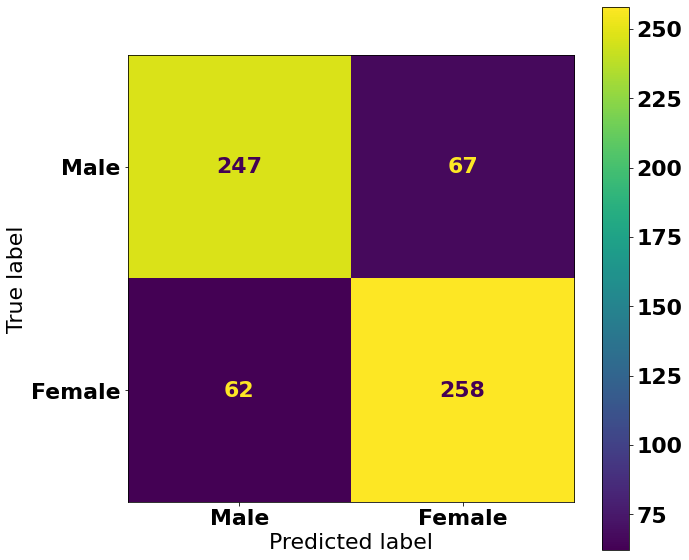

In [12]:
c = confusion_matrix(y_test, y_pred)
cp = ConfusionMatrixDisplay(c, display_labels=["Male", "Female"])
fig, ax = plt.subplots(figsize=(10,10))
cp.plot(ax = ax)

#### Classification Report

In [28]:
print("\t\t\tKNN report:\n",classification_report(y_pred,y_test, digits=3))

			KNN report:
               precision    recall  f1-score   support

      female      0.969     0.969     0.969       322
        male      0.968     0.968     0.968       312

    accuracy                          0.968       634
   macro avg      0.968     0.968     0.968       634
weighted avg      0.968     0.968     0.968       634

